# Task-5: Exploratory Data Analysis

### Submitted by : SOYABUL ISLAM


<p>Here I am going to analyze data with visual representation. We will see how products in different regions and states were sold and amde profit.How different factores change the perception in products Sales and Profits.
<br>Importing necessary libraries to visualize data and read dataset</p>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
superstore= pd.read_csv("SampleSuperstore.csv")
superstore

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


### Checking the data types of every columns of the dataset with th ehelp of info function

In [3]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [4]:
superstore.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

## <span style="color:blue">As we can see there are no NULL values in the dataset. </span>

In [13]:
superstore.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [23]:
correlation=superstore.corr(method='kendall')
correlation

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.001465,0.010015,0.037496,-0.003111
Sales,-0.001465,1.000000,0.238978,-0.041826,0.452118
Quantity,0.010015,0.238978,1.000000,-0.000698,0.171843
Discount,0.037496,-0.041826,-0.000698,1.000000,-0.428205
Profit,-0.003111,0.452118,0.171843,-0.428205,1.000000


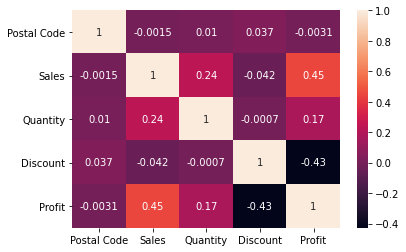

In [79]:
sns.heatmap(correlation, xticklabels= correlation.columns, yticklabels= correlation.columns, annot= True,)

## <span style="color:blue">Pie Chart </span>

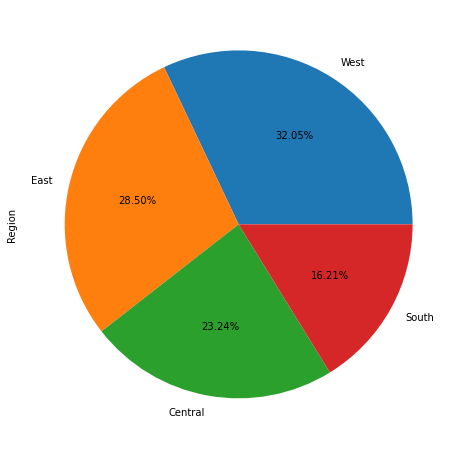

In [171]:
plt.figure(figsize=(8,8))
superstore['Region'].value_counts().plot.pie(autopct='%1.2f%%')

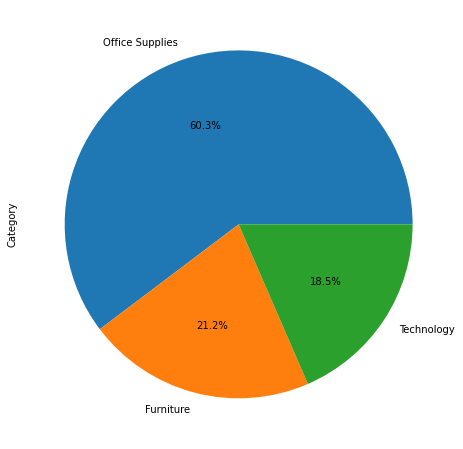

In [135]:
plt.figure(figsize=(8,8))
superstore['Category'].value_counts().plot.pie(autopct='%1.1f%%')

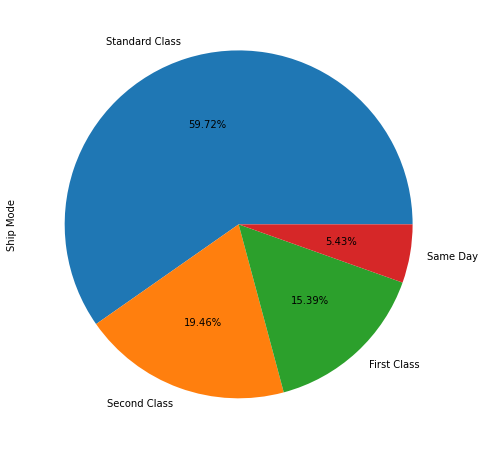

In [165]:
plt.figure(figsize=(8,8))
superstore['Ship Mode'].value_counts().plot.pie(autopct='%1.2f%%')

## <span style="color: green">Pairplot of data considering Category and Region as hue</span>

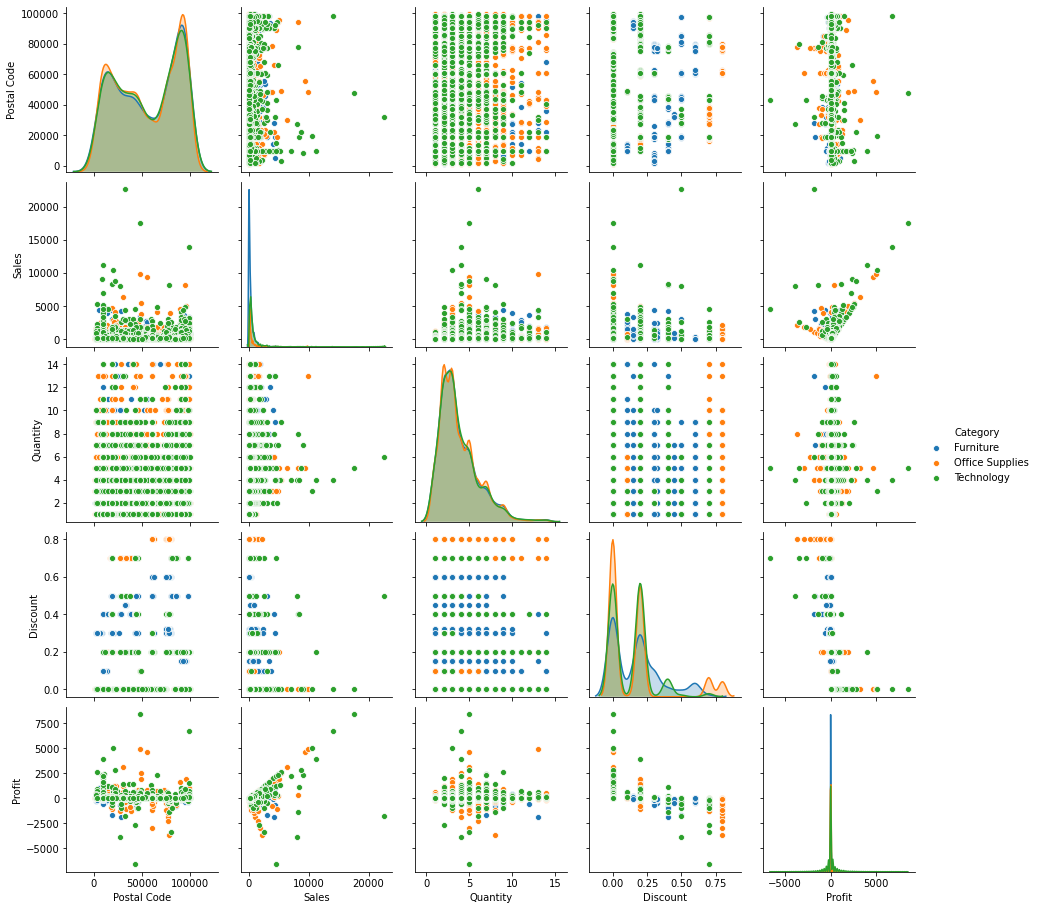

In [87]:
sns.pairplot(superstore, hue='Category')

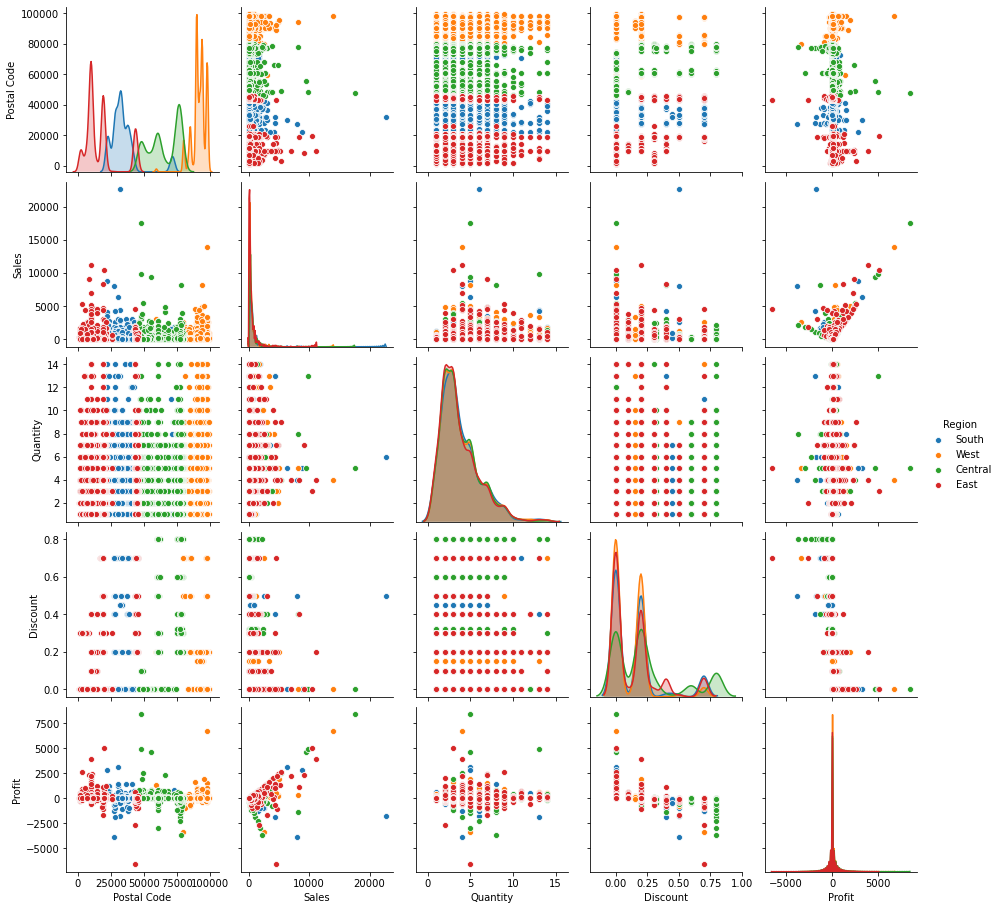

In [88]:
sns.pairplot(superstore, hue='Region')

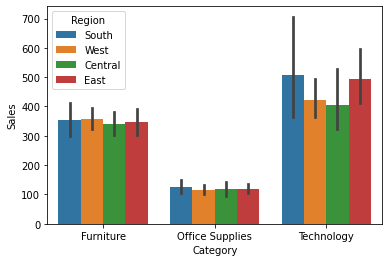

In [16]:
sns.barplot(x='Category', y='Sales', hue='Region', data= superstore, )


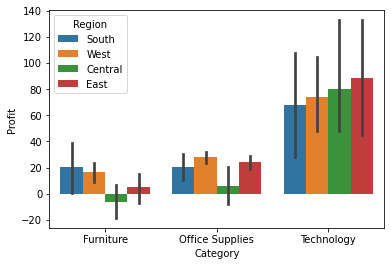

In [17]:
sns.barplot(x='Category', y='Profit', hue='Region', data= superstore, )

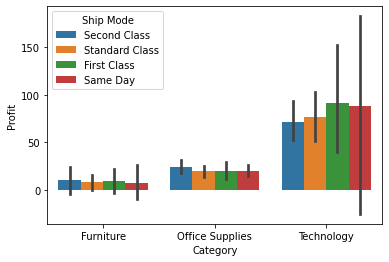

In [18]:
sns.barplot(x='Category', y='Profit', hue='Ship Mode', data= superstore, )

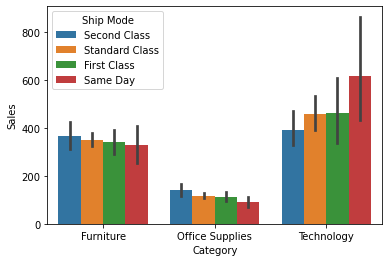

In [91]:
sns.barplot(x='Category', y='Sales', hue='Ship Mode', data= superstore, )

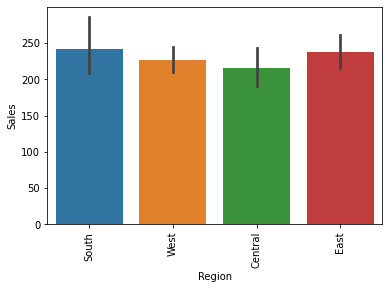

In [147]:
data=sns.barplot(x='Region', y='Sales', data= superstore,)
for item in data.get_xticklabels():
    item.set_rotation(90)

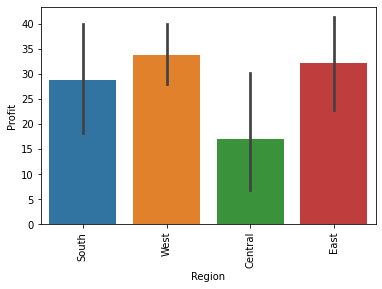

In [138]:
data=sns.barplot(x='Region', y='Profit', data= superstore,)
for item in data.get_xticklabels():
    item.set_rotation(90)

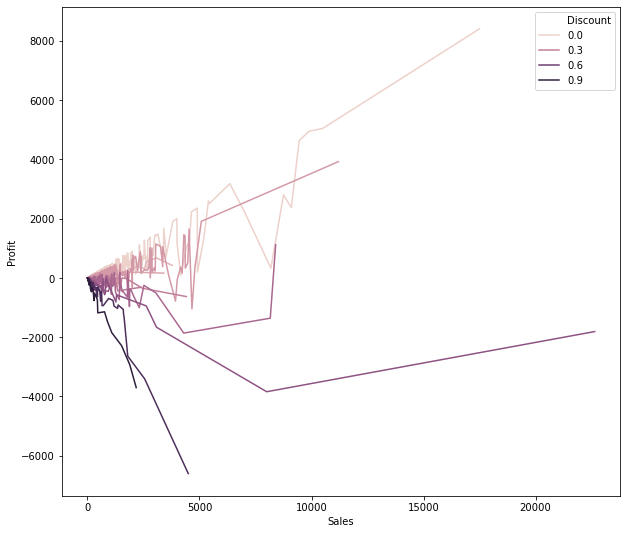

In [134]:
plt.figure(figsize=(10,9))
sns.lineplot(x='Sales', y='Profit', hue='Discount', data= superstore)

## <span style="color:blue">From this visualization: </span>
  <span style="color:blue"><ol>
    <li>For Discount=0.0, the profit scale goes very high </li>
    <li>For discount more than 0 or we may say 10,20 or 30% discount the profit is good but not the best. </li>
    <li>For profit between 0.3 to 0.6  sales rate gets very high but it seems that the profit is not goos, sometimes it takes a lot loss when the sale is low.</li>
    <li>For discount More than 0.6 the loss is very high , there has no profit and sale is also low</li>
    </ol></span>

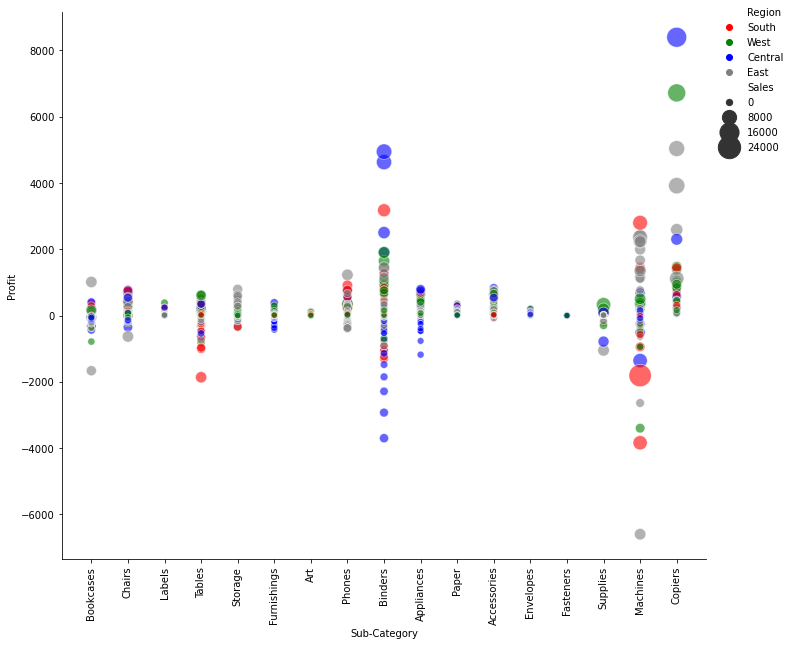

In [65]:
relplot=sns.relplot(x="Sub-Category", y="Profit", hue="Region", size="Sales",
            sizes=(40,500), alpha=.6, palette=['r','g','b','gray'],
            height=9, aspect=1, data=superstore)
leg = relplot._legend
leg.set_bbox_to_anchor([1.1,1]) 
leg._loc = 1
for axes in relplot.axes.flat:
    _ = axes.set_xticklabels(axes.get_xticklabels(), rotation=90)
plt.tight_layout()


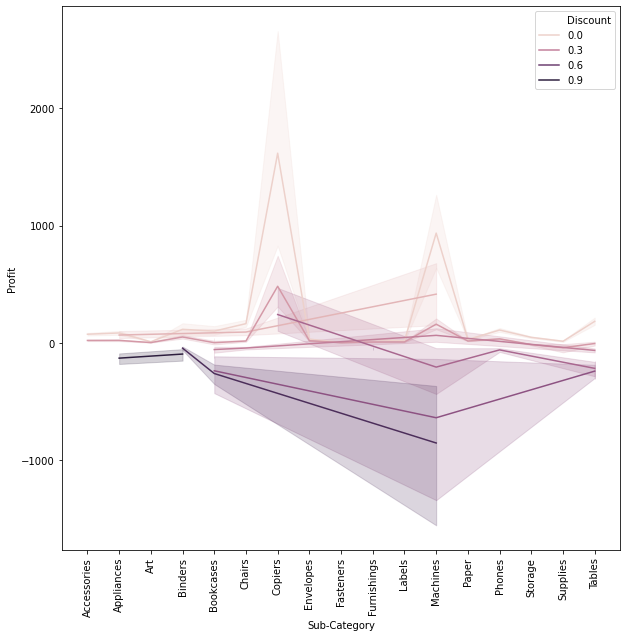

In [107]:
plt.figure(figsize=(10,10))
line=sns.lineplot(x='Sub-Category', y='Profit', hue='Discount', data= superstore)
for item in line.get_xticklabels():
    item.set_rotation(90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

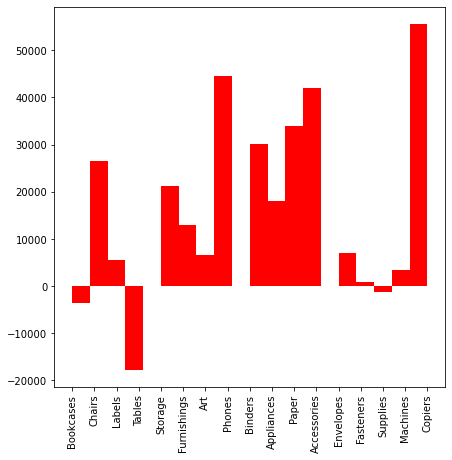

In [170]:
x=superstore['Sub-Category']
plt.figure(figsize=(7,7))
bars=plt.hist(x, bins=20, weights=superstore['Profit'], stacked=True,color='r', label='Profit',        
)
plt.xticks(rotation=90)



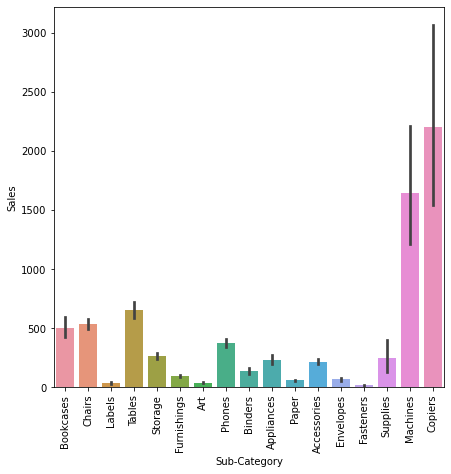

In [167]:
plt.figure(figsize=(7,7))
data=sns.barplot(x='Sub-Category', y='Sales', data= superstore,)
for item in data.get_xticklabels():
    item.set_rotation(90)

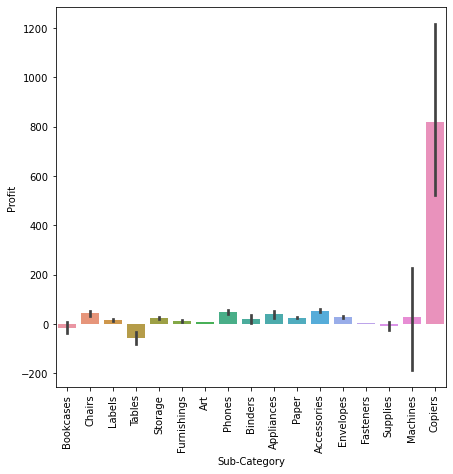

In [168]:
plt.figure(figsize=(7,7))
data=sns.barplot(x='Sub-Category', y='Profit', data= superstore,)
for item in data.get_xticklabels():
    item.set_rotation(90)

## <span style="color:gray" > From All these visualizations we can say that Copiers are the most sold products. Second are Machines, which fall under Tecnology category.<br>
## If we talk about profit Copiers are the most profitable product, where as Machines are less least profitable. From the data it is seen that Machines faces loss</span>